# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers.csv')
df.head(10)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
# Primero nos cercioramos que las empresas están ordenadas por la columna de ventas.
df = df.sort_values('Sales', ascending=False)
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
# Creamos un nuevo DF donde cortamos la compañia más grande
df_sales = df.drop(df.index[[0]])
df_sales.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


In [ ]:
mean_sales = df_sales['Sales'].mean()
print(
    ' Promedio de ventas sin contar a la \n',
    'compañía dominante: \n \n',
    '      $', mean_sales
)

 Promedio de ventas sin contar a la 
 compañía dominante: 
 
       $ 46602.416666666664


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

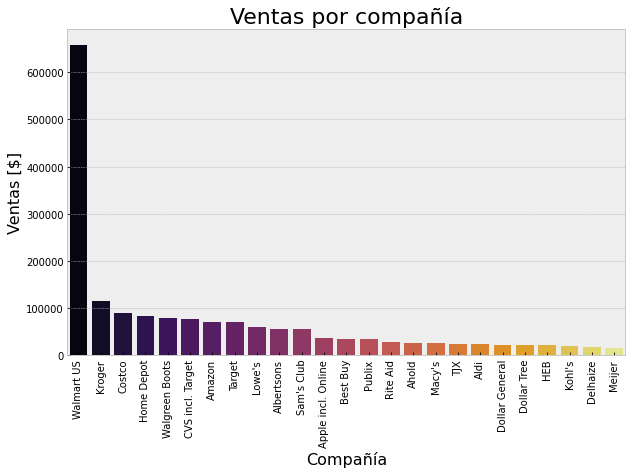

In [ ]:
# Creamos un DF auxiliar para ordenar las compañias
df_sales_sort = df.sort_values('Sales', ascending=False)

# Creamos un histograma para observar el comportamiento
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_sales_sort, x='Company', y='Sales', palette="inferno")
ax.set_title('Ventas por compañía', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Ventas [$]', fontsize=16)
plt.show()

In [ ]:
# Por tener un outlier bastante fuerte, usaremos la mediana para responder la pregunta
median_sales =  df['Sales'].median()
print(
    ' Dinero en ventas de la mayoría de\n',
    'las compañías: \n \n',
    '      $', median_sales 
)

 Dinero en ventas de la mayoría de
 las compañías: 
 
       $ 34980.0


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

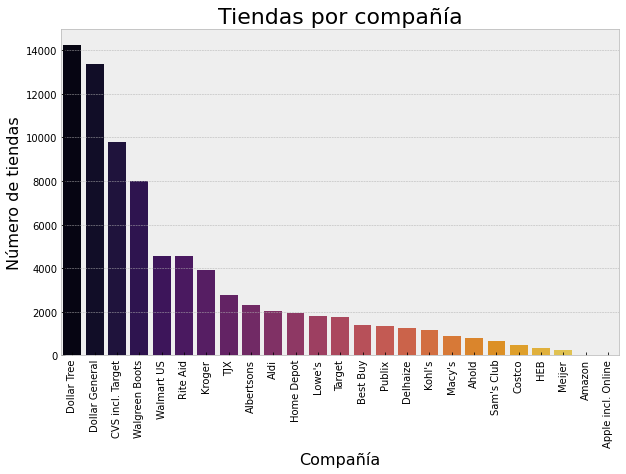

In [ ]:
# Creamos un DF auxiliar para ordenar las compañias
df_stores_sort = df.sort_values('Stores', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_stores_sort, x='Company', y='Stores', palette="inferno")
ax.set_title('Tiendas por compañía', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Número de tiendas', fontsize=16)
plt.show()

In [ ]:
mean_stores =  df['Stores'].mean()
print(
    ' Número de tiendas de la mayoría de\n',
    'las compañías: \n \n',
    '      ', int(mean_stores)
)

 Número de tiendas de la mayoría de
 las compañías: 
 
        3466


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

##### Para este caso, usaremos el DF en el que se cortó la empresa lider, por representar un valor anómalo.

In [ ]:
# Realizaremos una regresión lineal para observar el comportamiento de las variables 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
# Quitamos los valores de NaN y en su lugar ponemos la media
df_sales['Stores'] = df_sales['Stores'].fillna(df['Stores'].mean())
dataX = df_sales[["Stores"]]
X_train = np.array(dataX)
y_train = df_sales['Sales'].values
 
# Instanciamos el objeto
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones 
y_pred = regr.predict(X_train)

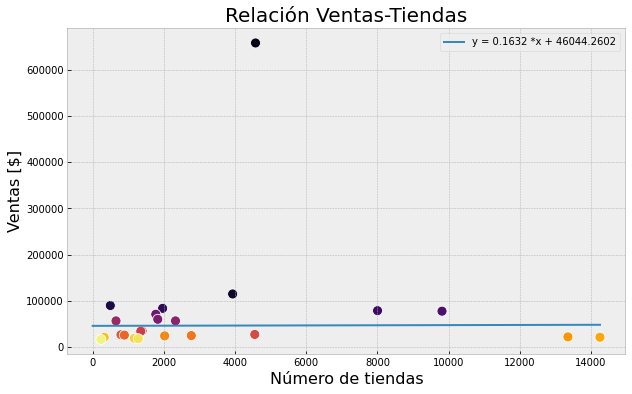

In [ ]:
x = np.linspace(0, int(np.max(df_sales['Stores'])), int(np.max(df_sales['Stores'])))
y = regr.coef_*x + regr.intercept_
m = regr.coef_ ; b = regr.intercept_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Stores', y='Sales', hue='Company', 
                palette='inferno', legend=False, s=100)
plt.plot(x, y, label = f'y = {m[0]:.4f} *x + {regr.intercept_:.4f}')
plt.title('Relación Ventas-Tiendas', fontsize=20)
plt.ylabel('Ventas [$]', fontsize=16)
plt.xlabel('Número de tiendas', fontsize=16)
plt.legend()
plt.show()

##### Como vemos, sin contar a la compañía 'Walmart US', la tendencia de la relación entre las ventas y el número total de ventas tienda a cero. Podemos concluir que mayor número de tiendas físicas no se refleja como un mayor valor de ventas por empresa.

### 5. ¿Cuál es el rango que existe entre las ventas?

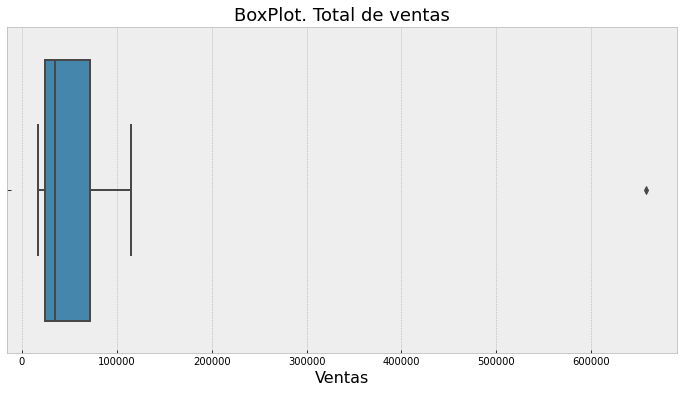

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Sales')
plt.title('BoxPlot. Total de ventas', fontsize=18)
plt.xlabel('Ventas', fontsize=16)
plt.show()

In [ ]:
# Contemplando todos los datos
rango = df['Sales'].max() - df['Sales'].min()
print(
    ' El rango total de todas las\n',
    'compañías es: \n \n',
    '      $', int(rango)
)

 El rango total de todas las
 compañías es: 
 
       $ 641527


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

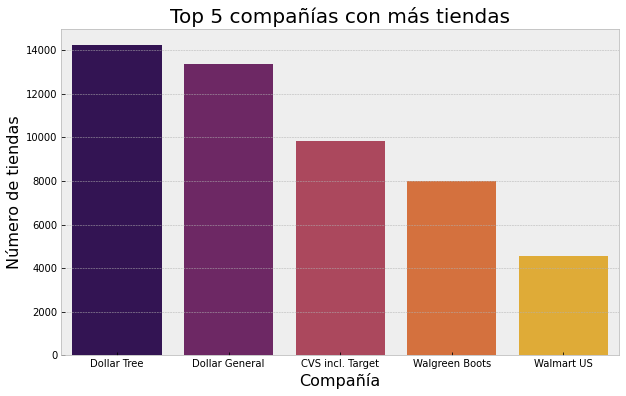

 TOP 5 COMPAÑÍAS CON MAYOR NÚMERO 
       DE TIENDAS FÍSICAS.       
 
 ----------------------------------------------------
 Compañía:            Dollar Tree 
 Número de tiendas:   14250 
 ----------------------------------------------------
 ----------------------------------------------------
 Compañía:            Dollar General 
 Número de tiendas:   13350 
 ----------------------------------------------------
 ----------------------------------------------------
 Compañía:            CVS incl. Target 
 Número de tiendas:   9813 
 ----------------------------------------------------
 ----------------------------------------------------
 Compañía:            Walgreen Boots 
 Número de tiendas:   8002 
 ----------------------------------------------------
 ----------------------------------------------------
 Compañía:            Walmart US 
 Número de tiendas:   4574 
 ----------------------------------------------------


In [ ]:
# Empresas con más tiendas físicas
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_stores_sort[:5], x='Company', y='Stores', palette="inferno")
ax.set_title('Top 5 compañías con más tiendas', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Número de tiendas', fontsize=16)
plt.show()

# Sobreescribimos los índices del DF
df_stores_sort.index = range(0,len(df_stores_sort))

print(' TOP 5 COMPAÑÍAS CON MAYOR NÚMERO \n',
      '      DE TIENDAS FÍSICAS.       \n ')
for i in range(5):
    print(' ----------------------------------------------------\n',
          'Compañía:           ', df_stores_sort['Company'][i], '\n',
          'Número de tiendas:  ', int(df_stores_sort['Stores'][i]), '\n',
          '----------------------------------------------------')

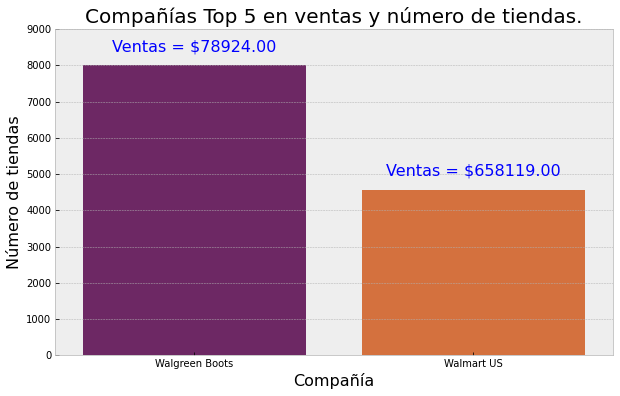

In [ ]:
# Empresas con mayores ventas y mayores tiendas físicas
# Creamos dos variables auxiliares con los rangos de interés
top5_sales = df_sales_sort[:5]
top5_stores= df_stores_sort[:5]

matches = top5_sales['Company'].isin(top5_stores['Company'])
company_matches = top5_sales.loc[matches == True]

# Ordenamos desde el número de tiendas 
company_matches = company_matches.sort_values('Stores', ascending=False)

# Sobreescribimos los índices
company_matches.index = (0,1)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=company_matches, x='Company', y='Stores', palette="inferno")
for i in range(2):
    plt.text(i, company_matches['Stores'][i]+300, 'Ventas = $%.2f'%company_matches['Sales'][i], 
            ha='center', va='bottom', fontsize=16, color = 'blue')
ax.set_title('Compañías Top 5 en ventas y número de tiendas.', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Número de tiendas', fontsize=16)
ax.set_ylim(0, 9000)
plt.show()

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

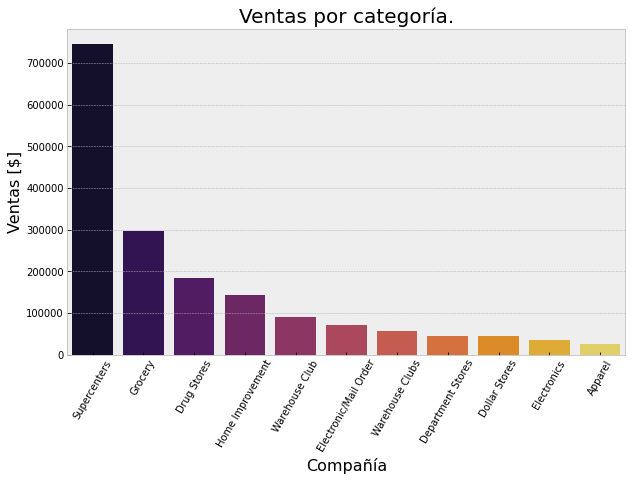

In [ ]:
# Agrupamos por categoria y mostramos la suma de las variables numéricas
category = df.groupby(by = ['Category']).sum()

# Ordenamos el DF
category = category.sort_values('Sales', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=category, x=category.index, y='Sales', palette="inferno")
ax.set_title('Ventas por categoría.', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Ventas [$]', fontsize=16)
plt.show()


### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

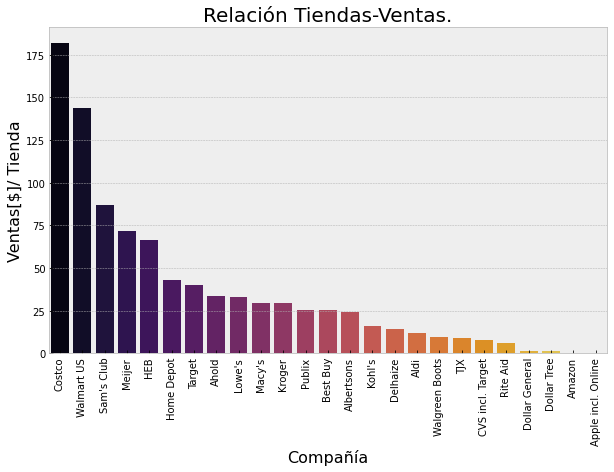

In [ ]:
# Creamos una nueva columna en el DF original
df['Relation'] = df['Sales'] / df['Stores']

# Ordenamos el DF y se asigna a una nueva variable
df_rel = df.sort_values('Relation', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_rel, x='Company', y='Relation', palette="inferno")
ax.set_title('Relación Tiendas-Ventas.', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Compañía', fontsize=16)
ax.set_ylabel('Ventas[$]/ Tienda', fontsize=16)
plt.show()

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

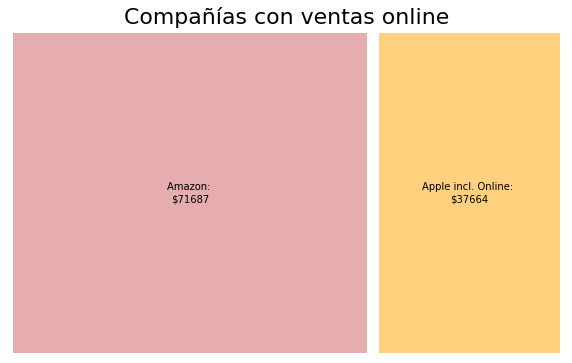

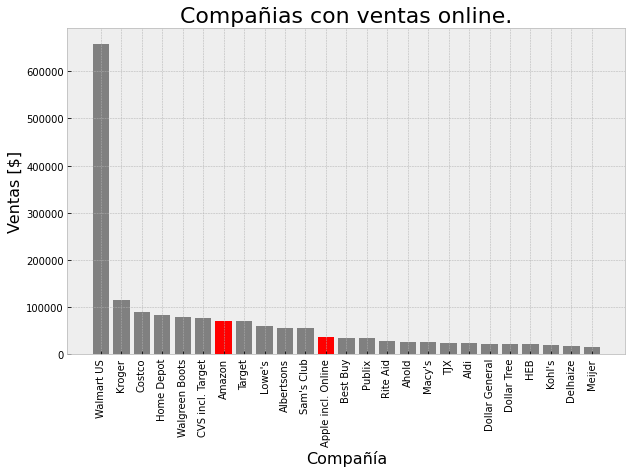

In [ ]:
# Aquellas empresas que venden de forma online son las que no cuentan con tiendas físicas
# A los valores NaN los remplazamos por cero
df['Stores'] = df['Stores'].fillna(0)

# Cortamos el DF con una condición
df_online = df[df['Stores'] == 0]

# Ordenamos los índices
df_online.index = [0,1]

import squarify 
plt.figure(figsize=(10,6))
labels = [str(df_online['Company'][i]) + ': \n$' + str(df_online['Sales'][i]) for i in range(2)]
squarify.plot(sizes=df_online['Sales'], label=labels, 
              color=['indianred', 'orange'], pad=True, alpha=0.5)
plt.title('Compañías con ventas online', fontsize=22)
plt.axis('off')
plt.show()


# Lista de colores
c = []
for com in df_sales_sort['Company']:
    if com == 'Amazon' or com == 'Apple incl. Online':
        c.append('red')
    else:
        c.append('gray')
# Posición de estas empresas respecto a las ventas
plt.figure(figsize=(10,6))
plt.bar(df_sales_sort['Company'], df_sales_sort['Sales'], color=c)
plt.title('Compañias con ventas online.', fontsize=22)
plt.xlabel('Compañía', fontsize=16)
plt.ylabel('Ventas [$]', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

## III. Tus propias preguntas

### 10. ¿Qué empresas aumentaron más el número de tiendas?

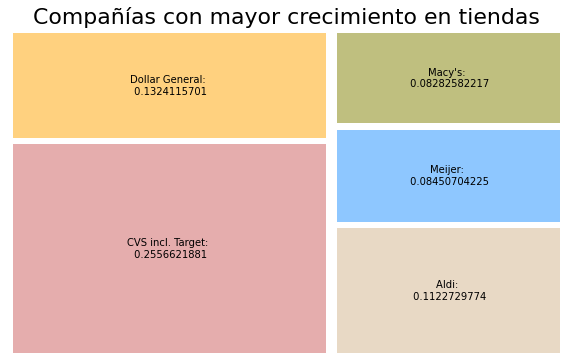

In [ ]:
Increase = df.sort_values('Store Count Growth', ascending=False)
Increase.index = range(0, len(Increase))
plt.figure(figsize=(10,6))
labels = [str(Increase['Company'][i]) + ': \n ' + str(Increase['Store Count Growth'][i]) for i in range(5)]
colors =  ['indianred', 'orange', 'tan', 'dodgerblue', 'olive']
squarify.plot(sizes=Increase['Store Count Growth'][0:5], label=labels, 
              color=colors, pad=True, alpha=0.5)
plt.title('Compañías con mayor crecimiento en tiendas', fontsize=22)
plt.axis('off')
plt.show()

### 11. ¿Qué correlación tienen las variables respecto a las ventas?

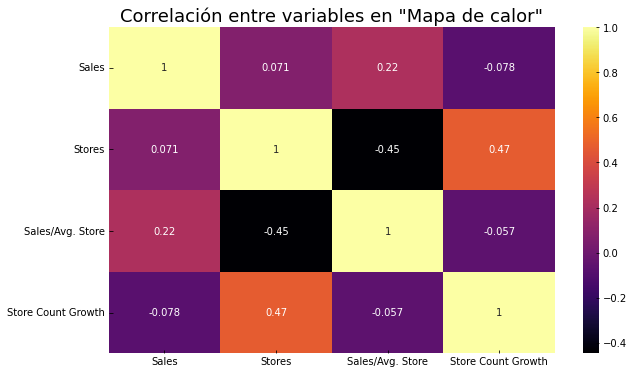

In [ ]:
# Dejamos las variables originales
Correlation = df.drop(columns='Relation')

mat_corr = Correlation.corr()  
plt.figure(figsize=(10,6))
sns.heatmap(mat_corr, cmap = 'inferno', annot = True)
plt.title('Correlación entre variables en "Mapa de calor"', fontsize=18)
plt.show()

## Conclusiones generales

- *Walmart US* es el competidor, y por mucho más fuerte.
- Tener más número de tiendas no se refleja directamente en un aumento en las ventas.
- La categoría de *Supercenters* domina las ventas.
- Del top 5 de empresas con más tiendas físicas, solo dos (*Walgreen Boots* y *Walmart US*) están a su vez en el top 5 de ventas, lo que recalca el punto #2.
- Comercios exculsivamente online, no destacan en el total de ventas.
- La correlación entre las variables respecto a las ventas no nos dice mucho, por lo que debe haber más variables que influyan de manera más decisiva en el total de ventas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08fe86f1-cf56-4ff9-bf3d-a7e89c8119e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>